# Holopy Demo

### Based on tutorial here:
https://holopy.readthedocs.io/en/master/tutorial/recon_tutorial.html

### Make sure you install all necessary dependencies

!pip install nose

!pip install git+https://github.com/manoharan-lab/holopy.git

### Import necessary libraries

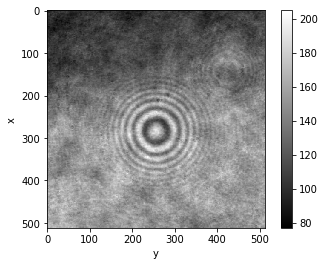

In [7]:
import holopy as hp
from holopy.core.io import get_example_data_path
import numpy as np
import holopy as hp
from holopy.core.io import get_example_data_path, load_average
from holopy.core.process import bg_correct

### Display raw imagery

In [ ]:
raw_holo = hp.load_image('image01.jpg', spacing = 0.0851)
hp.show(raw_holo)

### Create and display reconstructed image

/env/lib/python3.6/site-packages/holopy/core/io/vis.py:264: UserWarning: Image contains complex values. Taking image magnitude.
  warn("Image contains complex values. Taking image magnitude.")


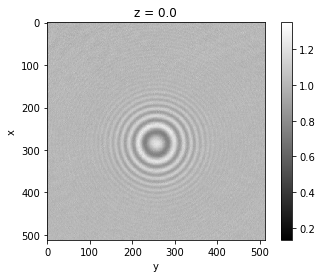

In [9]:
raw_holo = hp.load_image('image01.jpg', spacing = 0.0851, medium_index = 1.33, illum_wavelen = 0.66, )
bg = load_average(['bg01.jpg','bg02.jpg','bg03.jpg'], refimg = raw_holo)
holo = bg_correct(raw_holo, bg)

zstack = np.linspace(0, 20, 11)
rec_vol = hp.propagate(holo, zstack)
hp.show(rec_vol)

### View IMAGINARY reconstructed imagery

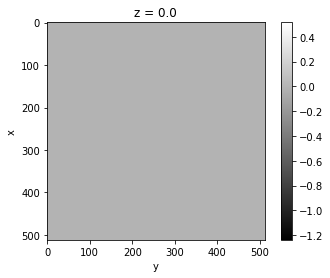

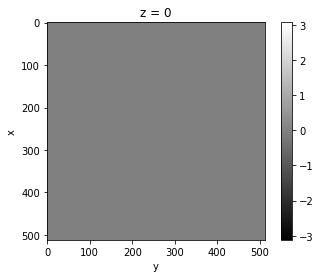

In [10]:
hp.show(rec_vol.imag)
hp.show(np.angle(rec_vol))

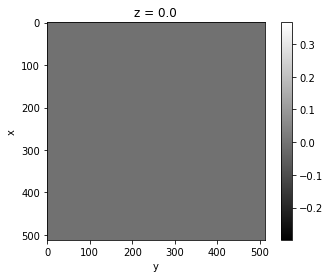

In [11]:
med_wavelen = holo.illum_wavelen / holo.medium_index
rec_vol = hp.propagate(holo, zstack*med_wavelen)
hp.show(rec_vol.imag)

In [12]:
rec_vol = hp.propagate(holo, zstack, cfsp = 3)